---

## 🔹 **Step 1: What is an RNN (Recurrent Neural Network)?**

---

### 🧠 First: What type of problems ANN or CNN can’t handle well?

Let’s say you want to **analyze the meaning of a sentence** like:

> *“The movie was not bad.”*

* An **ANN** sees this sentence like a bag of words — it doesn’t care about the **order**.
* A **CNN** is good at images but doesn’t really understand **sequence or context**.
* So… these models might miss that “not bad” actually means **good**.

---

### 🤯 Enter **RNN** — Recurrent Neural Network

> RNNs are designed to handle **sequential data** — where **order matters**.

---

### 🎯 **Where RNN is used?**

| Use Case                     | What is sequential here?        |
| ---------------------------- | ------------------------------- |
| Sentiment analysis           | Sequence of words in a sentence |
| Stock price prediction       | Sequence of prices over days    |
| Time-series weather forecast | Sequence of past temperatures   |
| Language translation         | Word-by-word transformation     |
| Music generation             | Sequence of musical notes       |

---

### 🧩 **How does an RNN work internally?**

Imagine you're reading a sentence **word-by-word**:

> "The movie was not bad."

An RNN works like a **memory loop**. It:

1. Takes in **one word at a time**.
2. **Remembers what it saw before**.
3. Uses that memory to **understand the current word better**.

---

### 🔄 Visual: RNN Unfolded

```
Input Words ➝ [The] ➝ [movie] ➝ [was] ➝ [not] ➝ [bad]
                   ↓       ↓        ↓       ↓       ↓
                Hidden   Hidden   Hidden  Hidden  Hidden
                State    State    State   State   State
```

Each step passes **a "memory"** to the next — this is called a **hidden state**.

So at the end, the model has a **summary** of the sentence that captures meaning from all previous words.

---

### 💡 Why this is better than Basic feedforward ANN (dense fully coonected)?

If you give "not bad" to an ANN — it treats “not” and “bad” separately.

But an RNN reads it in order → understands the combined effect → predicts *positive* sentiment.

---

### 🤖 What’s the catch with simple RNNs?

* They **forget long sentences** (can’t remember the start by the end).
* That’s why we use **LSTM** (Long Short-Term Memory)

---

---

## 🔹 **Step 2: What is LSTM and How It Works**

---

### 🧠 **1. What is an RNN?**

A **Recurrent Neural Network (RNN)** is a type of neural network that:

* **Remembers past information** using hidden states 🔁
* Is designed for **sequence data**, like:

  * Sentences (text)
  * Sensor readings (time series)
  * Speech/audio

Instead of treating each data point independently (like ANN), RNNs pass information **from one step to the next** — so they have **memory**.

📦 For example:

```
Input sequence: [“I”, “love”, “BTS”]
RNN reads: I → love → BTS
And learns that “BTS” depends on what came before.
```

---

### ❌ **Problem with RNN: Vanishing Gradient**

While RNNs *can* learn from sequences, they have trouble remembering **long-term dependencies**. For example:

> “I went to Korea last year. The trip was… \[something about BTS].”

Basic RNN forgets earlier parts of the sentence over time. This is called the **vanishing gradient** problem during training.

---

### ✅ **2. LSTM to the Rescue!**

### 🔁 LSTM = Long Short-Term Memory

It’s a **special type of RNN** that solves this problem by introducing:

* A **Cell State** (long-term memory)
* **Gates** that control what to keep/forget

🧠 **3 Gates** in an LSTM:

| Gate        | Role                         | Analogy                        |
| ----------- | ---------------------------- | ------------------------------ |
| Forget Gate | Decides what info to discard | "Forget irrelevant stuff"      |
| Input Gate  | What new info to store       | "Update memory with new ideas" |
| Output Gate | What to pass to next layer   | "Say this part out loud"       |

---

### 📦 Memory System Inside LSTM

Imagine an LSTM like a smart editor with a notepad:

* It reads one word at a time
* Updates its notebook (memory)
* Decides what to remember or throw away
* Uses that notebook to make better predictions

---

### 🧪 What kind of data does LSTM work best on?

✅ LSTM is ideal for:

* **Sentiment analysis** (predict if movie review is positive or negative)
* **Next word prediction**
* **Stock prediction**
* **Speech generation**
* **Music composition**

---

### 💡 Example: IMDB Movie Sentiment Dataset

> Input: “This movie was absolutely amazing and heartwarming...”

LSTM can understand the full sentence meaning, **not just words one by one**, because it **remembers context**.

---

---

## 🔹 **Step 3: Build an LSTM Sentiment Classifier on IMDB Dataset**

We’ll:

1. Load IMDB dataset
2. Preprocess the text data
3. Build the model using `Embedding`, `LSTM`, `Dense`
4. Compile, train, and evaluate

---


###**📦Load the IMDB dataset**

Keras gives you this dataset ready-to-use — already tokenized.

In [18]:
from tensorflow.keras.datasets import imdb # importing the IMDB movie review dataset

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# imdb.load_data(num_words=10000) ->	Load the top 10,000 most common words only (to keep things manageable)
# X_train, X_test ->	Each is a list of reviews, where each review is a sequence of word indexes (integers)
# y_train, y_test ->	Labels: 1 = positive review, 0 = negative review. So instead of:"This movie is awesome" You’ll get: [1, 45, 6, 1289]

###**📏 Let's now pad the sequences so that all reviews are of equal length.**

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# pad_sequences(...)	Makes sure all reviews are exactly 200 words long
# maxlen=200	Longer reviews will be cut; shorter ones will be padded with zeros at the beginning
# This ensures the input shape is fixed: (samples, 200)

---

---

##**🔹 Step 4: Build the LSTM Model using Keras**

In [20]:
from tensorflow.keras.models import Sequential # importing the model-building class Sequential, which lets us stack layers one by one in order
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Embedding	Turns word indices (like 42, 102) into real-valued vectors
# LSTM	Learns sequence patterns (like sentiment across word order)
# Dense	Final output layer (used for binary classification here)

model = Sequential() # creating a new empty model — we’ll now start adding layers to it.

model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
# input_dim=10000	Size of vocabulary (we kept only top 10,000 words)
# output_dim=32	Each word is represented as a vector of 32 numbers. this vector of 32 real numbers represent the word's meaning, context, and relationships with other words.
# input_length=200	Each review is exactly 200 words long (padded earlier)
# So now your input shape becomes: (200 words per review × 32 values per word) → (200, 32)

model.add(LSTM(64))
# LSTM(64)	64 memory units (cells) — it reads sequences and learns context over time
# Internally	It tracks patterns across time (like "not good" = negative) using gates and memory cells
# Output of this will be: a 64-dimensional vector representing the meaning of the review.

model.add(Dense(1, activation="sigmoid"))
# Dense(1) means 1 output neuron because it's a binary classification (positive or negative)
# activation='sigmoid'	Converts the output to a probability between 0 and 1
# If output > 0.5 → positive sentiment and If output < 0.5 → negative sentiment

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


---

---

##**🔹 Step 5: Compile and Train the Model**

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# optimizer='adam'	Optimizer is the algorithm used to adjust the weights. Adam is fast and reliable (combines momentum + RMSProp).
# loss='binary_crossentropy'	Since this is a binary classification task (positive or negative), we use binary crossentropy to calculate the error.
# metrics=['accuracy']	You want to monitor accuracy while training — it will print that after every epoch.

training_log = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
# x_train, y_train	Your input text (as sequences) and their corresponding labels
# epochs=5	Train for 5 full passes over the entire dataset
# batch_size=64	Use 64 samples at a time while updating weights
# validation_split=0.2	Use 20% of training data for validation (to see how well it generalizes)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 148ms/step - accuracy: 0.6693 - loss: 0.5854 - val_accuracy: 0.8512 - val_loss: 0.3564
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.8919 - loss: 0.2752 - val_accuracy: 0.8672 - val_loss: 0.3160
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - accuracy: 0.9320 - loss: 0.1862 - val_accuracy: 0.8752 - val_loss: 0.3211
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.9481 - loss: 0.1507 - val_accuracy: 0.8692 - val_loss: 0.3409
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 144ms/step - accuracy: 0.9603 - loss: 0.1186 - val_accuracy: 0.8652 - val_loss: 0.3562


---

---

##**🔹 Step 6: Evaluate & Predict — the final step of RNN sentiment model where we’ll:**

**Evaluate performance on unseen test data**

**Make predictions**

**Plot the confusion matrix to visually understand performance**

---

### **✅ Step 6.1: Evaluate on Test Set**

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test) # model.evaluate(...)	Runs the model on x_test and compares predictions to y_test
print("Test Loss:", test_loss) # test_loss	Shows how wrong the model's predictions are (error score)
print("Test Accuracy:", test_accuracy) # test_accuracy	Shows how often the model got the sentiment right

782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8623 - loss: 0.3823
Test Loss: 0.3812171518802643
Test Accuracy: 0.85944002866745


---

---

###**✅ Step 6.2: Predict on Test Data**

In [23]:
y_pred_probabilities = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step


In [24]:
print(y_pred_probabilities)

[[0.47531787]
 [0.995968  ]
 [0.4348608 ]
 ...
 [0.01696132]
 [0.0312759 ]
 [0.24859013]]


This returns probabilities (e.g., 0.73 → likely positive sentiment)

We’ll convert it to binary classes (0 or 1) using:

In [25]:
import numpy as np
y_pred_classes = (y_pred_probabilities > 0.5).astype("int32") # int32 is just standard and efficient. No harm if you used int64, but int32 is enough here.
print(y_pred_classes) # now probabilities are converted into binary classes (0 or 1)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


###**✅ Step 6.3: Confusion Matrix**

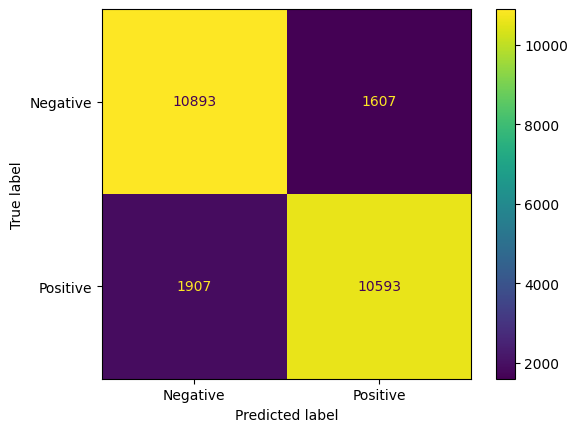

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()

---
1e+04 simply means 10,000 here in the first block.

### 🔍 What This Confusion Matrix Tells Us:

|                      | **Predicted: Negative** | **Predicted: Positive** |
| -------------------- | ----------------------- | ----------------------- |
| **Actual: Negative** | ✅ `10000` correct       | ❌ `2087` misclassified  |
| **Actual: Positive** | ❌ `1516` misclassified  | ✅ `10984` correct       |

---

### ✅ Meaning:

* **Diagonal cells (yellow)**: Correct predictions — model did well here.
* **Off-diagonal cells (purple)**: Mistakes — model confused one sentiment for the other.
* **Overall:** The model is classifying reviews quite well. We're seeing strong performance and this plot confirms it visually.

---